In [18]:
import pandas as pd
import matplotlib.pyplot as plt #Para plotear
import math #para la raiz cuadrada
index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
Temperature=[25.90357143, 26.59981565, 26.03432392, 26.45682625, 25.54658296, 24.59970053,
 23.69249173, 23.45595238, 23.2422619,  21.72567252, 21.55833333, 22.85833333,
 20.63630952, 20.09583333, 19.33392857, 18.84702381, 18.65297619, 18.93869048,
 18.46973455, 18.46586128]
gb=[]
gb_m=[]
gb_h=[]
gbeta_vh=[]
gbeta_hv=[]
gu_v=[]
for T in Temperature:
        if(T<=13.35 or T>=40.08):
            b=0
        else:
            b=0.00202*T*(T-13.35) * math.sqrt(40.08 - T)   

        if(T<=12.286 or T>=32.461):
            b_h=0
        else:
            b_h=0.001044*T*(T-12.286) * math.sqrt(32.461 - T)

        if(T>=12.4 and T<=26.1):
            b_m=-0.9037+0.0727*T
        elif(T>26.1 and T<=32.5):
            b_m=1
        else:
            b_m=0
        #Según el ajuste
        x_1=0.559
        x_2=0.06
        #if(b_m!=0 and b!=0):
        #    x_1=beta_vh/(b*b_h)
        #    x_2=beta_hv/(b*b_m)
        #else:
        #    x_1=0
        #    x_2=0
        beta_vh=x_1*b*b_h
        beta_hv=x_2*b*b_m
        u_v=(8.692/10000)-((1.590/10000)*T)+((1.116/100000)* (T**2)) - ((3.408/10000000)*(T**3)) + ((3.809/1000000000)*(T**4))
        #print("b:",b,", b_h:",", b_m:",b_m,", beta_vh:",beta_vh,", beta_hv:",beta_hv,", u_v:",u_v)
        gb.append(b)
        gb_h.append(b_h)
        gb_m.append(b_m)
        gbeta_vh.append(beta_vh)
        gbeta_hv.append(beta_hv)
        gu_v.append(u_v)
        data_tuples = list(zip(Temperature,gb,gb_h,gb_m,gbeta_vh,gbeta_hv,gu_v))
        Tabla = pd.DataFrame(data_tuples, columns =['Temperatura','$b$','$b_h$','$b_m$','$gbeta_vh$','$gbeta_hv$','$u_v$']) 
#print(len(gb))

In [19]:
Tabla

,Temperatura,$b$,$b_h$,$b_m$,$gbeta_vh$,$gbeta_hv$,$u_v$
0,25.903571,2.473214,0.943032,0.979490,1.303767,0.145349,0.000030
1,26.599816,2.613893,0.962337,1.000000,1.406134,0.156834,0.000029
2,26.034324,2.499979,0.947305,0.988995,1.323847,0.148348,0.000030
3,26.456826,2.585388,0.959092,1.000000,1.386110,0.155123,0.000029
4,25.546583,2.399420,0.929980,0.953537,1.247360,0.137276,0.000031
5,24.599701,2.199439,0.886678,0.884698,1.090159,0.116750,0.000033
6,23.692492,2.003751,0.835461,0.818744,0.935797,0.098434,0.000034
7,23.455952,1.952316,0.820820,0.801548,0.895797,0.093892,0.000035
8,23.242262,1.905756,0.807192,0.786012,0.859916,0.089877,0.000035
9,21.725673,1.574757,0.701517,0.675756,0.617538,0.063849,0.000036


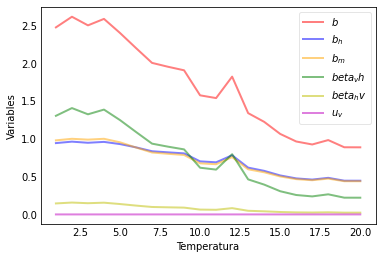

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.plot(t, Iv/N_v, 'orange', alpha=0.5, lw=2, label='Infectados Vector')
#ax.plot(t, Sv/N_v, 'cyan', alpha=0.5, lw=2, label='Susceptible Vector ')
#ax.plot(t, Sh, 'b', alpha=0.5, lw=2, label='Susceptible Host')
ax.plot(index, gb, 'r', alpha=0.5, lw=2, label='$b$')
ax.plot(index, gb_h, 'b', alpha=0.5, lw=2, label='$b_h$')
ax.plot(index, gb_m, 'orange', alpha=0.5, lw=2, label='$b_m$')
ax.plot(index, gbeta_vh, 'g', alpha=0.5, lw=2, label='$beta_vh$')
ax.plot(index, gbeta_hv, 'y', alpha=0.5, lw=2, label='$beta_hv$')
ax.plot(index, gu_v, 'm', alpha=0.5, lw=2, label='$u_v$')
#ax.plot(t, Rh, 'g', alpha=0.5, lw=2, label='Recuperados Host ')
#ax.plot(t, datos, 'black', alpha=0.5, marker='o', label='Observados COMAS ')
ax.set_xlabel('Temperatura')
ax.set_ylabel('Variables')
#ax.set_ylim(0,2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
#ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
#for spine in ('top', 'right', 'bottom', 'left'):
#    ax.spines[spine].set_visible(False)
plt.show()


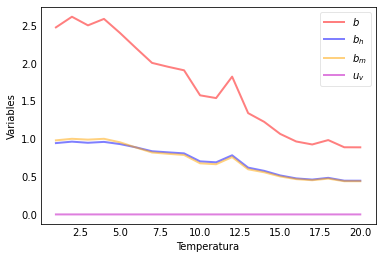

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.plot(t, Iv/N_v, 'orange', alpha=0.5, lw=2, label='Infectados Vector')
#ax.plot(t, Sv/N_v, 'cyan', alpha=0.5, lw=2, label='Susceptible Vector ')
#ax.plot(t, Sh, 'b', alpha=0.5, lw=2, label='Susceptible Host')
ax.plot(index, gb, 'r', alpha=0.5, lw=2, label='$b$')
ax.plot(index, gb_h, 'b', alpha=0.5, lw=2, label='$b_h$')
ax.plot(index, gb_m, 'orange', alpha=0.5, lw=2, label='$b_m$')
ax.plot(index, gu_v, 'm', alpha=0.5, lw=2, label='$u_v$')
#ax.plot(t, Rh, 'g', alpha=0.5, lw=2, label='Recuperados Host ')
#ax.plot(t, datos, 'black', alpha=0.5, marker='o', label='Observados COMAS ')
ax.set_xlabel('Temperatura')
ax.set_ylabel('Variables')
#ax.set_ylim(0,2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
#ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
#for spine in ('top', 'right', 'bottom', 'left'):
#    ax.spines[spine].set_visible(False)
plt.show()

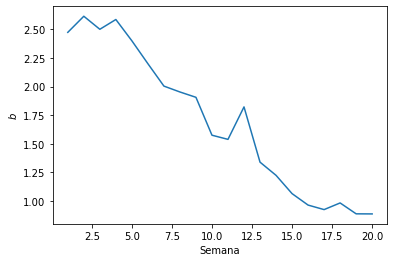

In [29]:
plt.plot(index,gb)
plt.xlabel("Semana")
plt.ylabel("$b$")
plt.show()

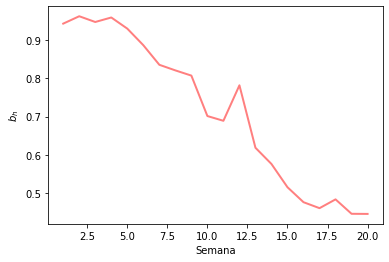

In [30]:
plt.plot(index, gb_h, 'r', alpha=0.5, lw=2, label='$b_h$')
plt.xlabel("Semana")
plt.ylabel("$b_h$")
plt.show()

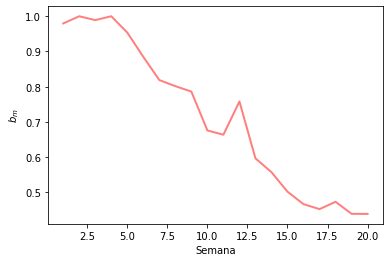

In [31]:
plt.plot(index, gb_m, 'r', alpha=0.5, lw=2, label='$b_m$')
plt.xlabel("Semana")
plt.ylabel("$b_m$")
plt.show()

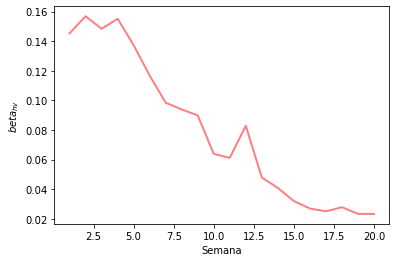

In [32]:
plt.plot(index, gbeta_hv, 'r', alpha=0.5, lw=2, label='$x_2$')
plt.xlabel("Semana")
plt.ylabel("$beta_{hv}$")
plt.show()

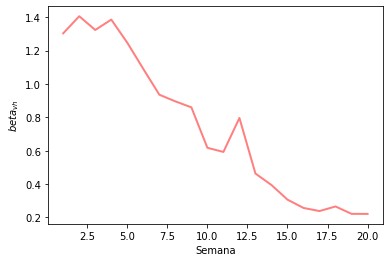

In [33]:
plt.plot(index, gbeta_vh, 'r', alpha=0.5, lw=2, label='$x_1$')
plt.xlabel("Semana")
plt.ylabel("$beta_{vh}$")
plt.show()

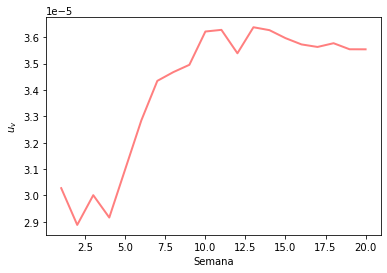

In [35]:
plt.plot(index, gu_v, 'r', alpha=0.5, lw=2, label='$u_v$')
plt.xlabel("Semana")
plt.ylabel("$u_{v}$")
plt.show()